<a href="https://colab.research.google.com/github/XuanThanh02/AI-btap-2/blob/main/b%C3%A0i_t%E1%BA%ADp_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6b22caeeefa7d9dfcba4f7124f562ea8270963dac1d59a88ceaf571c8dfb8849
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


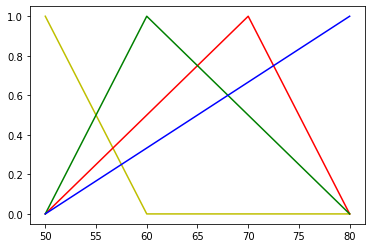

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)

slow=fuzz.trimf(x,[50, 50, 60])
medium=fuzz.trimf(x,[50, 70, 80])
medium_fast=fuzz.trimf(x,[50,60, 80])
full_speed=fuzz.trimf(x,[50, 80, 90])

plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")



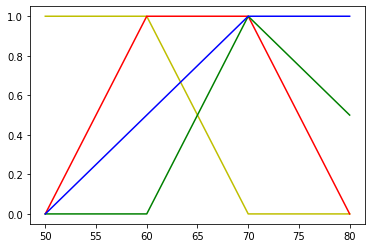

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
#tao hinh thang
slow=fuzz.trapmf(x,[40, 50, 60,70])
medium=fuzz.trapmf(x,[50 ,60, 70, 80])
medium_fast=fuzz.trapmf(x,[60, 70, 70, 90])
full_speed=fuzz.trapmf(x,[50, 70, 80, 80])
plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")
     

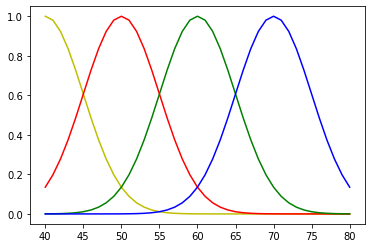

In [15]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(40,81,1)
#tao parabol
slow=fuzz.gaussmf(x,40,5)
medium=fuzz.gaussmf(x,50,5)
medium_fast=fuzz.gaussmf(x,60,5)
full_speed=fuzz.gaussmf(x,70,5)
plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")

19.637179487179488


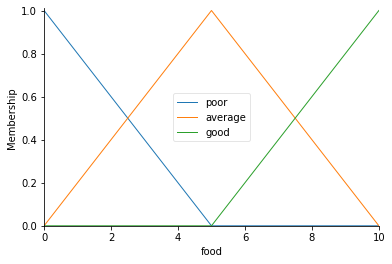

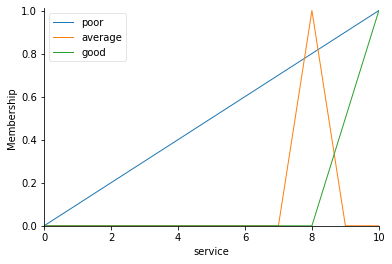

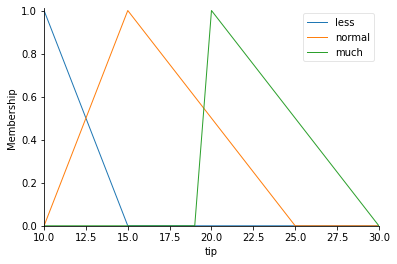

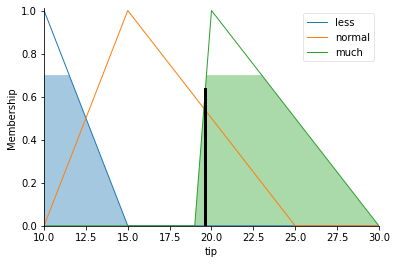

In [22]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0, 5, 10])
food['good'] =  fuzz.trimf(food.universe,[5, 10 , 10])

service['poor'] = fuzz.trimf(service.universe,[0, 10, 15])
service['average'] = fuzz.trimf(service.universe,[7, 8, 9])
service['good'] = fuzz.trimf(service.universe, [8, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 15])
tip['normal'] = fuzz.trimf(tip.universe, [10,15, 25])
tip['much'] = fuzz.trimf(tip.universe, [20, 20, 30])
food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])

rule4 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['good']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['good']&service['good'],tip['much'])

rule7 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule9 = ctrl.Rule(food['average']&service['good'],tip['much'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
     
     

72.30158426876838


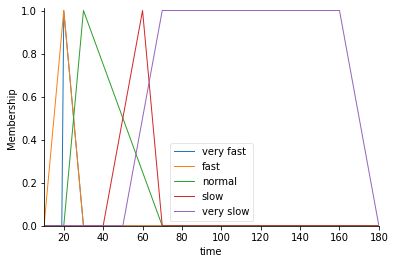

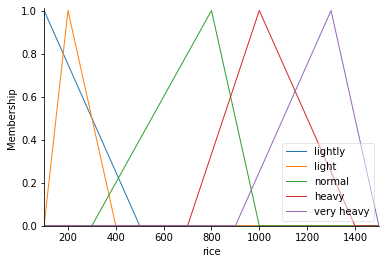

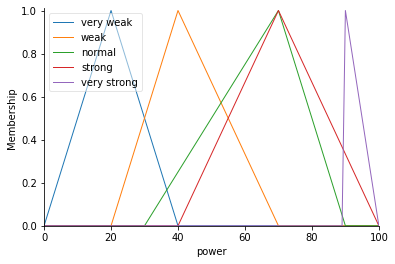

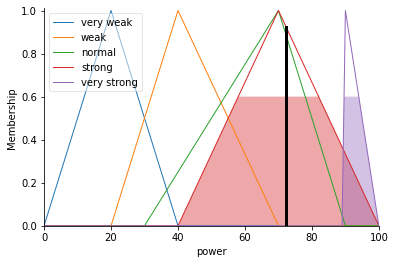

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[20, 20, 30])
time['fast'] = fuzz.trimf(time.universe,[10, 20, 30])
time['normal'] = fuzz.trimf(time.universe,[20, 30 ,70])
time['slow'] = fuzz.trimf(time.universe,[40, 60, 70])
time['very slow'] = fuzz.trapmf(time.universe,[50, 70, 160, 180])

rice['lightly'] = fuzz.trimf(rice.universe,[100,100,500])
rice['light'] = fuzz.trimf(rice.universe,[100,200,400])
rice['normal'] = fuzz.trimf(rice.universe,[300,800,1000])
rice['heavy'] = fuzz.trimf(rice.universe,[700,1000,1400])
rice['very heavy'] = fuzz.trimf(rice.universe,[900,1300,1500])

power['very weak']=fuzz.trimf(power.universe,[0,20,40])
power['weak']=fuzz.trimf(power.universe,[20,40,70])
power['normal']=fuzz.trimf(power.universe,[30,70,90])
power['strong']=fuzz.trimf(power.universe,[40,70,100])
power['very strong']=fuzz.trimf(power.universe,[90,90,100])

time.view()
rice.view()
power.view()


rule1 = ctrl.Rule(time['very fast']&rice['light'],power['strong'])
rule2 = ctrl.Rule(time['fast']&rice['light'],power['strong'])
rule3 = ctrl.Rule(time['normal']&rice['light'],power['normal'])
rule4 = ctrl.Rule(time['slow']&rice['light'],power['normal'])
rule5 = ctrl.Rule(time['very slow']&rice['light'],power['weak'])

rule6 = ctrl.Rule(time['very fast']&rice['lightly'],power['normal'])
rule7 = ctrl.Rule(time['fast']&rice['lightly'],power['normal'])
rule8 = ctrl.Rule(time['normal']&rice['lightly'],power['normal'])
rule9 = ctrl.Rule(time['slow']&rice['lightly'],power['weak'])
rule10 = ctrl.Rule(time['very slow']&rice['lightly'],power['very weak'])

rule11 = ctrl.Rule(time['very fast']&rice['normal'],power['very strong'])
rule12 = ctrl.Rule(time['fast']&rice['normal'],power['strong'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['strong'])
rule14 = ctrl.Rule(time['slow']&rice['normal'],power['normal'])
rule15 = ctrl.Rule(time['very slow']&rice['normal'],power['weak']) 
 
rule16 = ctrl.Rule(time['very fast']&rice['very heavy'],power['very strong'])
rule17 = ctrl.Rule(time['fast']&rice['very heavy'],power['very strong'])
rule18 = ctrl.Rule(time['normal']&rice['very heavy'],power['strong'])
rule19 = ctrl.Rule(time['slow']&rice['very heavy'],power['strong'])
rule20 = ctrl.Rule(time['very slow']&rice['very heavy'],power['normal'])

rule21 = ctrl.Rule(time['very fast']&rice['heavy'],power['very strong'])
rule22 = ctrl.Rule(time['fast']&rice['heavy'],power['very strong'])
rule23 = ctrl.Rule(time['normal']&rice['heavy'],power['strong'])
rule24 = ctrl.Rule(time['slow']&rice['heavy'],power['normal'])
rule25 = ctrl.Rule(time['very slow']&rice['heavy'],power['normal'])

power_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['rice']=600
powering.input['time']=20
powering.compute()
print(powering.output['power'])
power.view(sim=powering)